In [250]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from tools import networkHelpers as nh
from umap import UMAP
import scipy.stats as stats
import sklearn.metrics as metrics
from sklearn.cluster import KMeans

In [2]:
hgnc_mapper = nh.fetch_hgnc_mapper()

In [4]:
duncan = pd.read_excel('../data/mib-ms/Duncan2012-Fig2D-data.xlsx', sheet_name='Sheet1')
duncan.head()

,Kinase ID,Gene Symbol,Name,4 hrs AZD6244/DMSO,12 hrs AZD6244/DMSO,24 hrs AZD6244/DMSO
0,EPHA2,EPHA2,Ephrin type-A receptor 2 OS=Homo sapiens GN=EP...,0.879022,0.591562,0.401791
1,KS6A1,RPS6KA1,Ribosomal protein S6 kinase alpha-1 OS=Homo sa...,1.116863,1.148154,1.541700
2,ERK2,MAPK1,Mitogen-activated protein kinase 1 OS=Homo sap...,1.037528,1.000000,1.056818
3,KCC2G,CAMK2G,Calcium/calmodulin-dependent protein kinase ty...,1.318257,1.047129,3.133286
4,GSK3B,GSK3B,Glycogen synthase kinase-3 beta OS=Homo sapien...,0.981748,0.772681,1.247383


In [15]:
all_mibrna = pd.read_excel('../data/mib-ms/All_mibplusrnadata_autoscaled.xlsx', sheet_name='Sheet1', header=0, skiprows=0, index_col=0)
subtypes_all_mibrna = all_mibrna.iloc[0, :]
which_omic = all_mibrna.iloc[1, :]

all_mibrna = all_mibrna.loc[all_mibrna.index.tolist()[2:]]
rna_mibrna = all_mibrna[all_mibrna.columns[which_omic == 'rna']]
mib_mibrna = all_mibrna[all_mibrna.columns[which_omic != 'rna']]

mib_mibrna.head()

,SUM159.1,SUM159.2,MDA231.1,MDA231.2,SUM229neg.1,SUM229neg.2,HCC1806.1,HCC1806.2,MDA468.1,MDA468.2,...,HCC1954.1,HCC1954.2,MCF7.1,MCF7.2,T47D.1,T47D.2,HCC1428.1,HCC1428.2,ZR751.1,ZR751.2
AAK1,0.563173,0.620986,0.562031,0.426585,0.84158,0.602266,0.624378,0.633291,0.526394,0.469651,...,0.589088,0.559325,0.577343,0.650038,0.609829,0.610864,0.616032,0.384855,0.374681,0.751435
AAPK1,0.507465,0.577258,0.617139,0.583473,0.786363,0.550779,0.593335,0.688663,0.561773,0.574942,...,0.642642,0.633054,0.659526,0.724569,0.674675,0.689711,0.759279,0.564204,0.548872,0.799326
AAPK2,0.251648,0.477315,0.493465,0.418181,0.653195,0.422767,0.443998,0.656483,0.307084,0.317665,...,0.553135,0.567906,0.518407,0.660683,0.58118,0.596361,0.67794,0.4956,0.307634,0.697692
ABL1,0.109939,0.263185,0.436958,0.368187,0.500801,0.166916,0.179506,0.192641,-0.175774,0.272601,...,0.229982,0.226838,0.333653,0.453882,0.377198,0.286458,0.619932,0.241495,0.104607,0.492236
ABL2,0.123534,0.292926,0.460951,0.381616,0.516715,0.178025,0.216407,0.210545,-0.141703,0.277062,...,0.273476,0.27511,0.28847,0.425466,0.355888,0.28181,0.53327,0.303736,0.147329,0.541386


In [84]:
list(subtypes_all_mibrna)

['claudin',
 'claudin',
 'claudin',
 'basal',
 'basal',
 'basal',
 'her2',
 'her2',
 'her2',
 'basal/her2',
 'her2',
 'luminal',
 'luminal',
 'luminal',
 'luminal',
 'claudin',
 'claudin',
 'claudin',
 'claudin',
 'claudin',
 'claudin',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'her2',
 'her2',
 'her2',
 'her2',
 'her2',
 'her2',
 'her2',
 'her2',
 'her2',
 'her2',
 'basal/her2',
 'basal/her2',
 'luminal',
 'luminal',
 'luminal',
 'luminal',
 'luminal',
 'luminal',
 'luminal',
 'luminal']

In [83]:
list(mib_mibrna.columns)

['SUM159.1',
 'SUM159.2',
 'MDA231.1',
 'MDA231.2',
 'SUM229neg.1',
 'SUM229neg.2',
 'HCC1806.1',
 'HCC1806.2',
 'MDA468.1',
 'MDA468.2',
 'SUM229pos.1',
 'SUM229pos.2',
 'SKBR3.1',
 'SKBR3.2',
 'SKBR3.3',
 'BT474.1',
 'BT474.2',
 'BT474.3',
 'HCC1419.1',
 'HCC1419.2',
 'MDA361.1',
 'MDA361.2',
 'HCC1954.1',
 'HCC1954.2',
 'MCF7.1',
 'MCF7.2',
 'T47D.1',
 'T47D.2',
 'HCC1428.1',
 'HCC1428.2',
 'ZR751.1',
 'ZR751.2']

In [79]:
list(mib_mibrna.index)

['AAK1',
 'AAPK1',
 'AAPK2',
 'ABL1',
 'ABL2',
 'ACK1',
 'ACV1B',
 'ACVR1',
 'ADCK1',
 'ADK',
 'AGK',
 'AKT1',
 'AKT2',
 'AKT3',
 'ARAF',
 'AURKB',
 'AVR2A',
 'BCKD',
 'BMP2K',
 'BMPR2',
 'BMR1A',
 'BRAF',
 'BUB1',
 'CDK1',
 'CDK10',
 'CDK12',
 'CDK13',
 'CDK14',
 'CDK16',
 'CDK17',
 'CDK18',
 'CDK19',
 'CDK2',
 'CDK3',
 'CDK4',
 'CDK5',
 'CDK6',
 'CDK7',
 'CDK8',
 'CDK9',
 'CDKL5',
 'CHK1',
 'CHK2',
 'CHKA',
 'CHKB',
 'CLK1',
 'CLK2',
 'CLK3',
 'CLK4',
 'CSK',
 'CSK21',
 'CSK22',
 'CSK23',
 'DAPK3',
 'DCK',
 'DDR1',
 'DMPK',
 'DYR1A',
 'DYR1B',
 'E2AK1',
 'E2AK2',
 'E2AK4',
 'EGFR',
 'EPHA1',
 'EPHA2',
 'EPHA3',
 'EPHA4',
 'EPHA5',
 'EPHA7',
 'EPHB1',
 'EPHB2',
 'EPHB3',
 'EPHB4',
 'EPHB6',
 'ERBB2',
 'ERN1',
 'FAK1',
 'FAK2',
 'FER',
 'FGFR1',
 'FGFR2',
 'FGFR3',
 'FGFR4',
 'FN3K',
 'FRK',
 'FYN',
 'FYV1',
 'GAK',
 'GSK3A',
 'GSK3B',
 'GWL',
 'HCK',
 'HYKK',
 'IGF1R',
 'IKKA',
 'IKKB',
 'IKKE',
 'ILK',
 'INSR',
 'IPMK',
 'IRAK1',
 'IRAK4',
 'JAK1',
 'K6PL',
 'K6PP',
 'KAPCA',
 'KAPCB

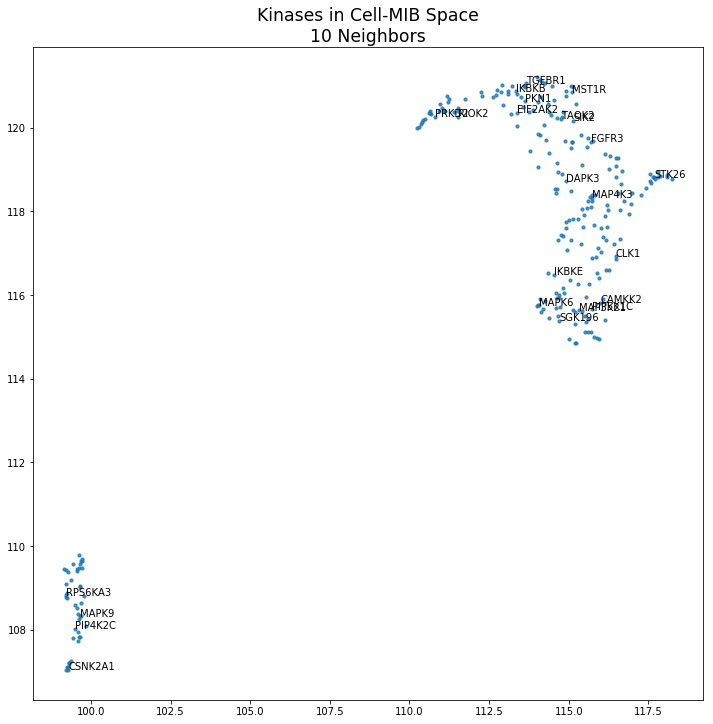

In [302]:
u = UMAP(n_neighbors=10)
coords = u.fit_transform(mib_mibrna)

fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(x=coords[:, 0], y=coords[:, 1], s=10, alpha = .8)
ax.set_title('Kinases in Cell-MIB Space\n10 Neighbors', size='xx-large')

# randomly annotate ~ 25% of points
for i, kinase_name in enumerate(mib_mibrna.index):
    if np.random.randn()>1.2:
        ax.annotate(kinase_name, (coords[i, 0], coords[i, 1]))

plt.show()

In [118]:
louv = pd.read_csv('/Users/isrobson/Github/KIN_ClusteringWithAnnotations/results/weighted/louvain_small_clusters.txt', sep='\t')
louv.set_index('names', inplace=True)
louv.columns = ['cluster_sub']
louv = louv.join(pd.read_csv('/Users/isrobson/Github/KIN_ClusteringWithAnnotations/results/weighted/louvain_clusters.txt', sep='\t').set_index('names'))
louv.columns = ['cluster_sub', 'cluster_super']
louv.head()

,cluster_sub,cluster_super
names,,
MST1R,11,3
YES1,11,3
TYRO3,11,3
FGR,11,3
SRC,11,3


In [95]:
mib_mibrna.index = pd.Series(mib_mibrna.index).apply(lambda x: hgnc_mapper[x])

In [120]:
pd.unique(louv['cluster_super'])

array([3, 2, 4, 7, 6, 5, 8, 1, 9])

### See how the ratio of each subcluster compares to ratios present here

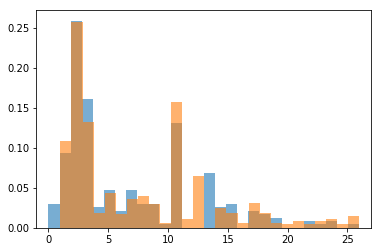

In [315]:
colors_kin = [louv['cluster_sub'][kin] if kin in set(louv.index) else 0 for kin in mib_mibrna.index]
plt.hist(colors_kin, alpha = 0.6, bins=28, density=True)
plt.hist(louv['cluster_sub'], alpha = 0.6, bins=27, density=True)
plt.xlim([-1, 27])
plt.show()

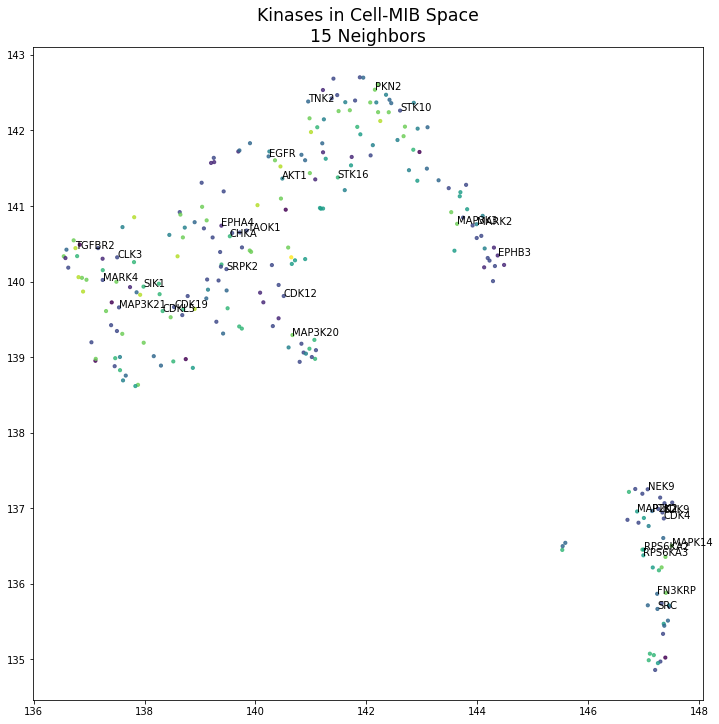

In [249]:
u = UMAP(n_neighbors=15)
coords = u.fit_transform(mib_mibrna)

fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(x=coords[:, 0], y=coords[:, 1], s=10, alpha = .8, c=colors_kin, cmap='viridis')
ax.set_title('Kinases in Cell-MIB Space\n15 Neighbors', size='xx-large')

# randomly annotate ~ 25% of points
for i, kinase_name in enumerate(mib_mibrna.index):
    if np.random.randn()>1.2:
        ax.annotate(kinase_name, (coords[i, 0], coords[i, 1]))

plt.show()

In [131]:
tau_matrix = np.zeros((len(mib_mibrna),len(mib_mibrna)))
tau_p_vals = np.zeros((len(mib_mibrna),len(mib_mibrna)))

ranked_mib = mib_mibrna.apply(stats.rankdata, axis=1)

for i in range(len(mib_mibrna)):
    for j in range(len(mib_mibrna)):
        tau_matrix[i,j], tau_p_vals[i,j] = stats.kendalltau(ranked_mib.iloc[i], ranked_mib.iloc[j])

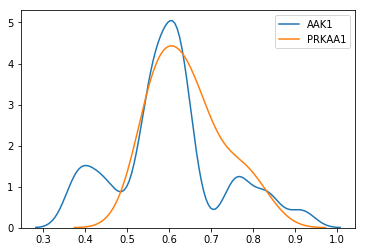

In [136]:
sns.kdeplot(mib_mibrna.iloc[0, :])
sns.kdeplot(mib_mibrna.iloc[1, :])
plt.show()

In [175]:
from sklearn.covariance import GraphicalLasso

glasso = GraphicalLasso(alpha=.1)
glasso.fit(mib_mibrna)

GraphicalLasso(alpha=0.1, assume_centered=False, enet_tol=0.0001,
        max_iter=100, mode='cd', tol=0.0001, verbose=False)

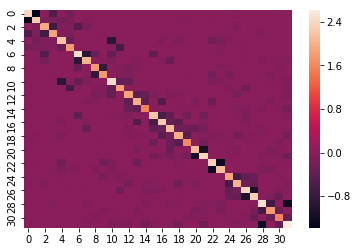

In [176]:
sns.heatmap(glasso.precision_)
plt.show()

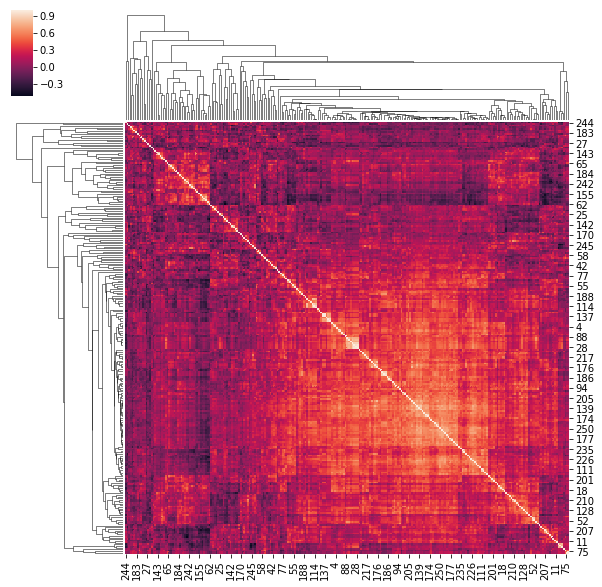

In [153]:
#fig, ax = plt.subplots(figsize = (12,12))
sns.clustermap(tau_matrix, metric='cosine')
plt.show()

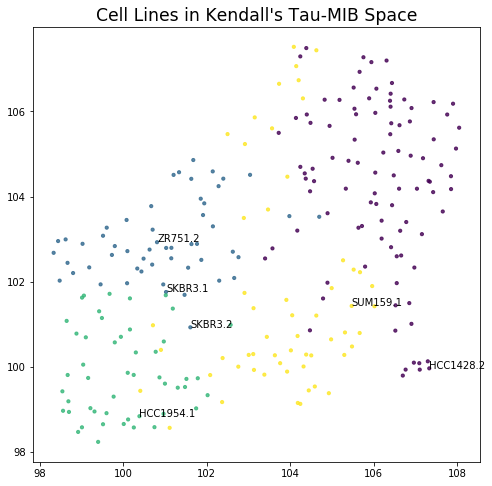

In [334]:
u_cor = UMAP(metric='cosine', n_neighbors=10, min_dist=.5)
cor_coords = u_cor.fit_transform(1-tau_matrix)

km = KMeans(n_clusters=4)
preds = km.fit_predict(1-tau_matrix)

fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x=cor_coords[:, 0], y=cor_coords[:, 1], s=10, alpha = .8, c = preds)
ax.set_title('Cell Lines in Kendall\'s Tau-MIB Space', size='xx-large')

# randomly annotate ~ 30% of cell lines 
for i, cell_name in enumerate(mib_mibrna.columns):
    if np.random.randn()>1:
        ax.annotate(cell_name, (cor_coords[i, 0], cor_coords[i, 1]))

plt.show()

In [ ]:
u_cor = UMAP(metric='cosine', n_neighbors=10)
cor_coords = u_cor.fit_transform(1-tau_matrix)

km = KMeans(n_clusters=4)
preds = km.fit_predict(1-tau_matrix)

fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x=cor_coords[:, 0], y=cor_coords[:, 1], s=10, alpha = .8, c = preds)
ax.set_title('Cell Lines in Kendall\'s Tau-MIB Space', size='xx-large')

# randomly annotate ~ 30% of cell lines
for i, cell_name in enumerate(mib_mibrna.columns):
    if np.random.randn()>1:
        ax.annotate(cell_name, (cor_coords[i, 0], cor_coords[i, 1]))

plt.show()

In [ ]:
sns.clustermap(tau_matrix*(tau_p_vals>.001))
plt.show()

In [191]:
tau_p_vals

array([[7.60078151e-36, 3.82539266e-04, 1.22547598e-02, ...,
        6.87554020e-01, 3.54116475e-03, 1.40940668e-01],
       [3.82539266e-04, 7.60078151e-36, 4.81278010e-08, ...,
        4.11283919e-01, 2.51940287e-04, 2.90030617e-04],
       [1.22547598e-02, 4.81278010e-08, 7.60078151e-36, ...,
        9.10377904e-01, 3.33350411e-04, 2.13465482e-02],
       ...,
       [6.87554020e-01, 4.11283919e-01, 9.10377904e-01, ...,
        7.60078151e-36, 4.11283919e-01, 2.65532096e-01],
       [3.54116475e-03, 2.51940287e-04, 3.33350411e-04, ...,
        4.11283919e-01, 7.60078151e-36, 1.69402084e-01],
       [1.40940668e-01, 2.90030617e-04, 2.13465482e-02, ...,
        2.65532096e-01, 1.69402084e-01, 7.60078151e-36]])

In [198]:
tau_p_vals[np.triu_indices_from(tau_p_vals, k=1)]

array([3.82539266e-04, 1.22547598e-02, 6.07248777e-03, ...,
       4.11283919e-01, 2.65532096e-01, 1.69402084e-01])

In [208]:
ranks = np.zeros_like(tau_p_vals)
ranks[np.triu_indices_from(ranks, k=1)] = stats.rankdata(tau_p_vals[np.triu_indices_from(tau_p_vals, k=1)], method='max')#.reshape(tau_p_vals.shape)
ranks[np.tril_indices_from(ranks, k=-1)] = ranks.T[np.tril_indices_from(ranks, k=-1)]
ranks

array([[    0.,  3586.,  8167., ..., 26802.,  6156., 15214.],
       [ 3586.,     0.,   327., ..., 21761.,  3195.,  3321.],
       [ 8167.,   327.,     0., ..., 30630.,  3455.,  9279.],
       ...,
       [26802., 21761., 30630., ...,     0., 21761., 18618.],
       [ 6156.,  3195.,  3455., ..., 21761.,     0., 16060.],
       [15214.,  3321.,  9279., ..., 18618., 16060.,     0.]])

/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)
/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


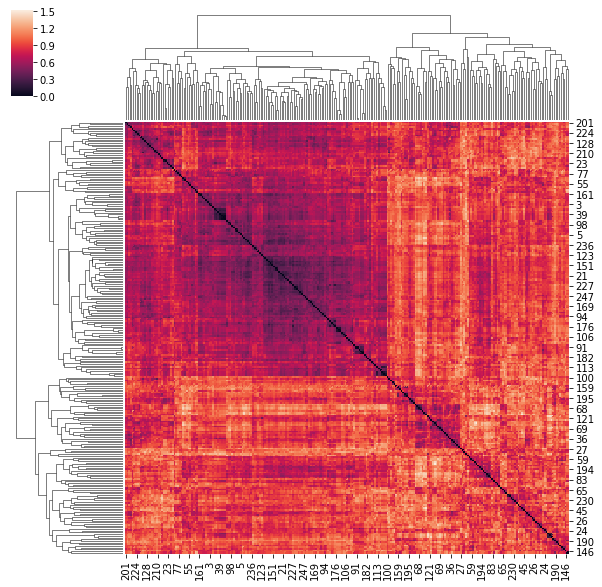

In [216]:
# this is the kendall's tau correlation distance 
sns.clustermap(1-tau_matrix)
plt.show()

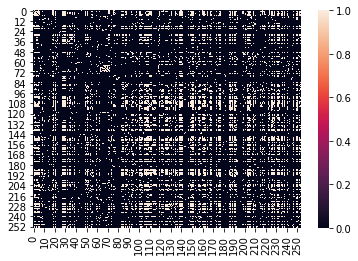

In [228]:
sns.heatmap(tau_p_vals < ranks/(len(mib_mibrna)*(len(mib_mibrna) - 1)/2)*.01)
fdr_mask = tau_p_vals < ranks/(len(mib_mibrna)*(len(mib_mibrna) - 1)/2)*.01
plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)
/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


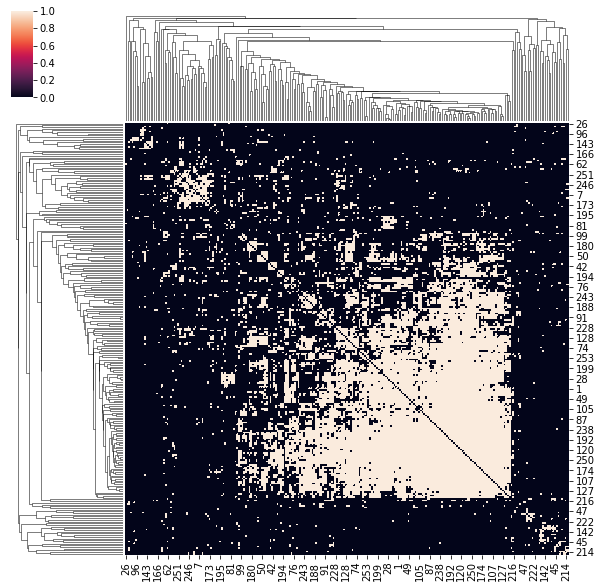

In [221]:
fdr_mask = tau_p_vals < ranks/(len(mib_mibrna)*(len(mib_mibrna) - 1)/2)*.05
sns.clustermap(fdr_mask, metric='cosine')
plt.show()

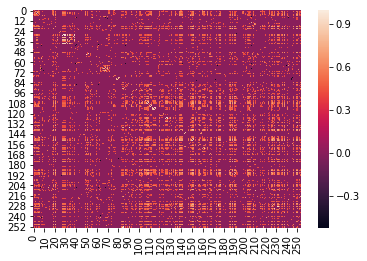

In [234]:
adj_matrix = fdr_mask * tau_matrix
sns.heatmap(adj_matrix)
plt.show()

In [317]:
from sklearn.cluster import KMeans
clust = KMeans(n_clusters=4)
preds = clust.fit_predict(2-adj_matrix)


In [271]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=10)
coords = iso.fit_transform(mib_mibrna)

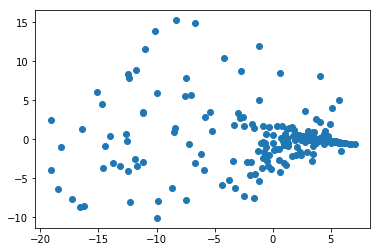

In [272]:
plt.scatter(coords[:, 0], coords[:, 1])
plt.show()

In [264]:
from sklearn.cluster import SpectralBiclustering
sb = SpectralBiclustering()
sb.fit(mib_mibrna)

SpectralBiclustering(init='k-means++', method='bistochastic',
           mini_batch=False, n_best=3, n_clusters=3, n_components=6,
           n_init=10, n_jobs=None, n_svd_vecs=None, random_state=None,
           svd_method='randomized')

In [275]:
from scipy.cluster.hierarchy import linkage

In [300]:
preds

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0, 3, 1, 2, 0, 2, 2, 2, 3, 3,
       1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 3, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1,
       0, 2, 0, 3, 1, 1, 0, 3, 3, 3, 0, 0, 0, 0, 0, 1, 0, 2, 3, 3, 3, 0,
       2, 0, 0, 2, 3, 0, 1, 1, 3, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 3, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 3, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 3, 3, 3, 1, 0, 0, 3, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 2, 1, 0, 3, 3, 2, 3, 0, 0, 3, 2, 0, 1, 3, 0, 3, 0, 0, 2,
       0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 1, 1], dtype=int32)

In [245]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation(affinity='precomputed')
preds = ap.fit_predict(adj_matrix)


In [303]:
metrics.adjusted_rand_score(preds, colors_kin)

0.001987221314590601

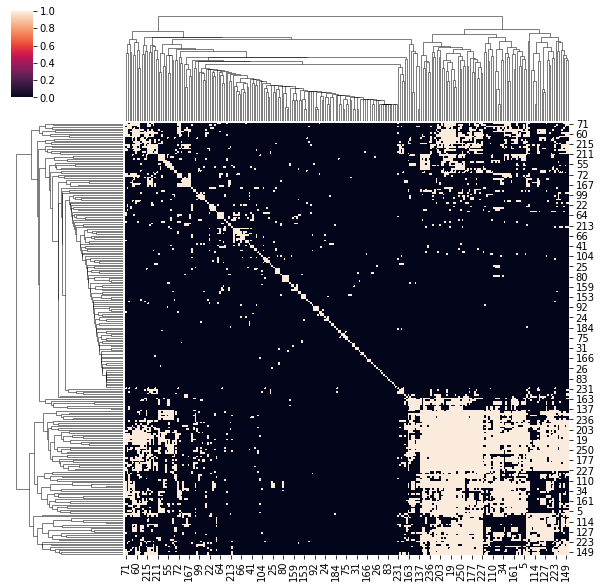

In [189]:
sns.clustermap(tau_p_vals<0.001)
plt.show()

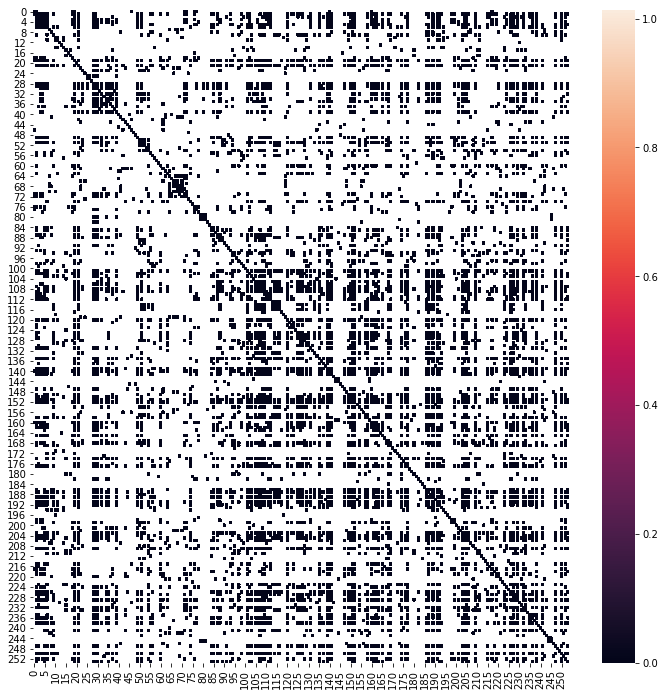

In [135]:
fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap(tau_p_vals, mask = tau_p_vals>0.001)
plt.show()

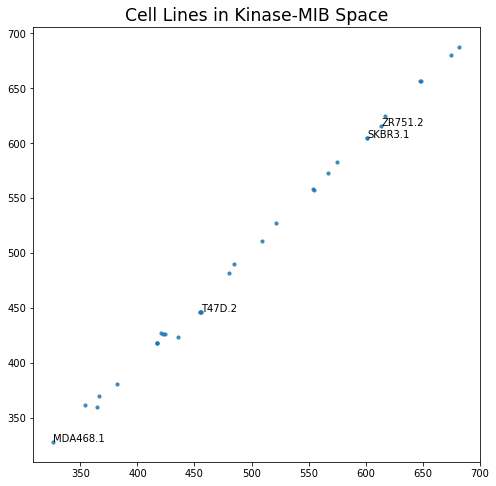

In [77]:
u_cell = UMAP(n_neighbors=5)
cell_coords = u_cell.fit_transform(mib_mibrna.T)

fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x=cell_coords[:, 0], y=cell_coords[:, 1], s=10, alpha = .8)
ax.set_title('Cell Lines in Kinase-MIB Space', size='xx-large')

# randomly annotate ~ 30% of cell lines
for i, cell_name in enumerate(mib_mibrna.columns):
    if np.random.randn()>1:
        ax.annotate(cell_name, (cell_coords[i, 0], cell_coords[i, 1]))

plt.show()

In [ ]:
'''bt474_lapatinib = pd.read_excel('../data/mib-ms/BT474-300nM Lapatinib Pooled stats.xlsx', sheet_name='Sheet1')
duncan.head()'''